In [60]:
import pandas as pd
import matplotlib.pyplot as plt

#Read files with updated datetime format
df = pd.read_csv('Data/formattedMeter.csv', header=None, names=["datetime","reading"])
df["datetime"] = pd.to_datetime(df["datetime"]).dt.strftime('%d-%m-%Y %H:%M:%S')

df

,datetime,reading
0,15-02-2020 22:58:00,143710
1,16-02-2020 16:13:00,143730
2,16-02-2020 17:44:00,143732
3,16-02-2020 18:57:00,143737
4,16-02-2020 20:17:00,143743
5,16-02-2020 22:32:00,143751
6,17-02-2020 00:50:00,143754
7,17-02-2020 07:05:00,143760
8,17-02-2020 21:06:00,143811
9,18-02-2020 18:09:00,143864


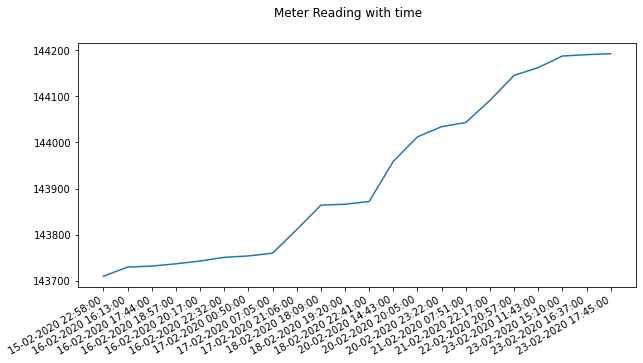

In [55]:
#Plot meter reading change with time
x = df_perc['datetime']
y = df_perc['reading']

fig=plt.figure(figsize=(10,5))
# plot
plt.plot(x,y)
fig.suptitle("Meter Reading with time")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()



In [56]:
# Calculation of total units consumed from previous date
df_date = df.copy()
df_date["datetime"] = pd.to_datetime(df["datetime"]).dt.strftime('%d-%m-%Y')
df_date = df_date.rename({'datetime': 'date'}, axis=1)
df_date

#finding maximum reading of the to find the meter reading
date_min = df_date.groupby(['date'], as_index=False).max()
date_min = date_min.rename({'reading': 'min'}, axis=1)
date_min["id"]=date_min.index
date_min

date_max = df_date.groupby(['date'], as_index=False).max()
date_max = date_max.rename({'reading': 'max'}, axis=1)
date_max['id']=date_max.index - 1
date_max

df_date=pd.merge(date_max,date_min,on='id')#,how='left')

df_date['units'] = df_date['max'] - df_date['min']
df_date['units'] = df_date['units'].fillna(0)
df_date= df_date.drop(['id','date_y','min'],axis=1)
df_date = df_date.rename({'date_x': 'date'}, axis=1)
df_date = df_date.rename({'max': 'max_reading'}, axis=1)
df_date



,date,max_reading,units
0,16-02-2020,143751,41
1,17-02-2020,143811,60
2,18-02-2020,143872,61
3,20-02-2020,144034,162
4,21-02-2020,144091,57
5,22-02-2020,144145,54
6,23-02-2020,144192,47


In [61]:
#Adding column for day of week
df_date['date'] = pd.to_datetime(df_date['date'])
df_date['day']=df_date['date'].dt.day_name()
df_date

,date,max_reading,units,day
0,2020-02-16,143751,41,Sunday
1,2020-02-17,143811,60,Monday
2,2020-02-18,143872,61,Tuesday
3,2020-02-20,144034,162,Thursday
4,2020-02-21,144091,57,Friday
5,2020-02-22,144145,54,Saturday
6,2020-02-23,144192,47,Sunday


Text(0, 0.5, 'Meter readings')

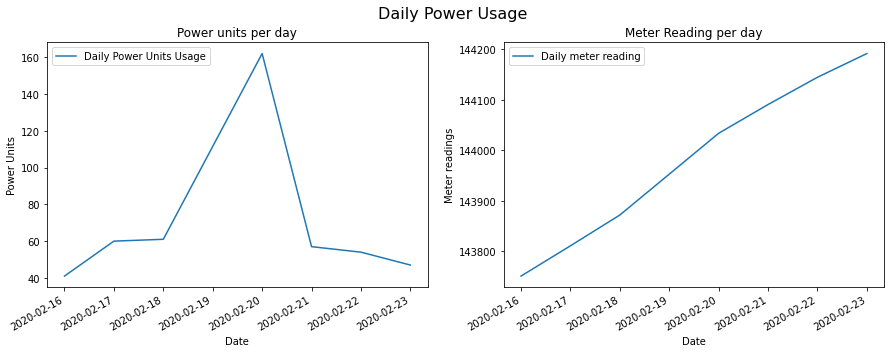

In [63]:
#PLot daily power usage
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
fig.suptitle("Daily Power Usage",fontsize=16)
#Power units per day
df_date.groupby(['date'])['units'].agg(sum).plot(legend=True,ax=axes[0],label="Daily Power Units Usage")
#Meter Reading per day
df_date.groupby(['date'])['max_reading'].agg(sum).plot(legend=True,ax=axes[1],label="Daily meter reading")
axes[0].set_title('Power units per day')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Power Units")
axes[1].set_title('Meter Reading per day')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Meter readings")

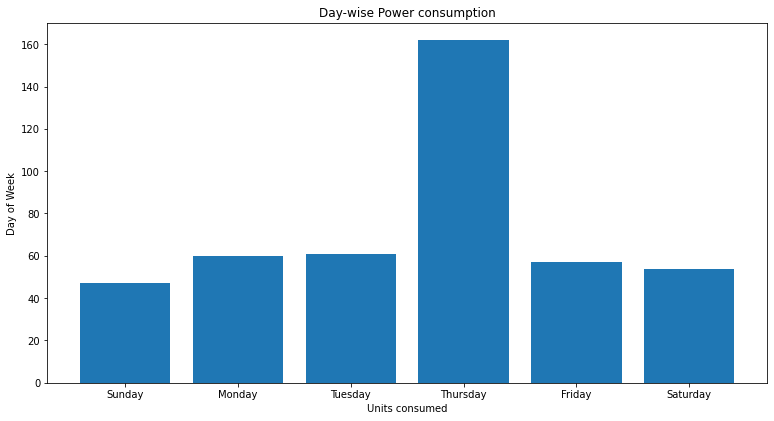

In [64]:
#Day-wise analysis of power consumption
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

x = df_date['day']
y = df_date['units']
ax.set_ylabel('Day of Week')
ax.set_xlabel('Units consumed')
ax.set_title("Day-wise Power consumption")
ax.bar(x,y)
plt.show()


In [2]:
# Analysis1
# 1. We have daily data for meter readings for a house for a week, we can know which time of a day has maximum power usage
# 2. We can see even the meter readings appear to be increasing at constant rate, but units consumed per day are varying
# 3. Major pikes in middle of the week and during weekends are lower. 
# factors may include family outings, children outdoor activities during weekends
# consumption of consoles/TVs for longer duration